In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_NW_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1.0,NaN,2.0,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,NaN
2,3.0,1.0,1.0,1.0,2.0,NaN,3.0,1.0,1.0
3,NaN,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0
4,4.0,1.0,1.0,3.0,NaN,NaN,3.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
679,2.0,NaN,NaN,NaN,2.0,1.0,3.0,1.0,1.0
680,5.0,NaN,10.0,10.0,4.0,10.0,NaN,6.0,3.0
681,1.0,1.0,NaN,3.0,2.0,1.0,1.0,1.0,1.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	99
float64		column 2	103
float64		column 3	103
float64		column 4	136
float64		column 5	132
float64		column 6	165
float64		column 7	136
float64		column 8	165
float64		column 9	165


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,584.000000,580.000000,580.000000,547.000000,551.000000,518.000000,547.000000,518.000000,518.000000
mean,4.422945,3.003448,3.134483,2.645338,3.170599,3.299228,3.257770,2.826255,1.476834
std,2.661759,2.867841,2.861063,2.657905,2.120876,3.450848,2.268051,3.018436,1.525554
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,5.250000,4.000000,5.000000,3.000000,4.000000,5.000000,4.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

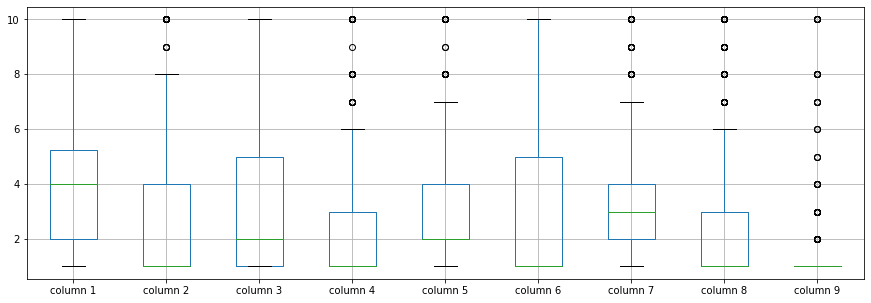

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.422945
column 2    3.003448
column 3    3.134483
column 4    2.645338
column 5    3.170599
column 6    3.299228
column 7    3.257770
column 8    2.826255
column 9    1.476834
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.602659,0.639177,0.525196,0.491448,0.543445,0.502493,0.474020,0.282753
column 2,0.602659,1.000000,0.895207,0.671531,0.707046,0.635980,0.746716,0.660818,0.412147
column 3,0.639177,0.895207,1.000000,0.680100,0.643684,0.647197,0.713318,0.668297,0.339238
column 4,0.525196,0.671531,0.680100,1.000000,0.501792,0.630274,0.622641,0.573487,0.298209
column 5,0.491448,0.707046,0.643684,0.501792,1.000000,0.565667,0.572361,0.627050,0.331139
column 6,0.543445,0.635980,0.647197,0.630274,0.565667,1.000000,0.601953,0.536842,0.299333
column 7,0.502493,0.746716,0.713318,0.622641,0.572361,0.601953,1.000000,0.607525,0.280605
column 8,0.474020,0.660818,0.668297,0.573487,0.627050,0.536842,0.607525,1.000000,0.412356
column 9,0.282753,0.412147,0.339238,0.298209,0.331139,0.299333,0.280605,0.412356,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [11]:
imputer = md.Midas(layer_structure = [9,9+76,9+76+76,9+76+76,9+76+76+76+76,9+76+76+76+76+76,9+76+76+76+76+76+76,9+76+76+76+76+76,9+76+76+76+76,9+76+76+76,9+76+76,9+76,9], vae_layer = False, seed = 760)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 28.372677712213424
Epoch: 1 , loss: 27.791615985688708
Epoch: 2 , loss: 25.22224253699893
Epoch: 3 , loss: 23.738042104811896
Epoch: 4 , loss: 23.649451392037527
Epoch: 5 , loss: 23.738841828845796
Epoch: 6 , loss: 23.559805075327557
Epoch: 7 , loss: 23.36334446498326
Epoch: 8 , loss: 23.635758445376442
Epoch: 9 , loss: 23.125335352761404
Epoch: 10 , loss: 22.761803036644345
Epoch: 11 , loss: 22.635283606392996
Epoch: 12 , loss: 22.874951521555584
Epoch: 13 , loss: 22.08106143133981
Epoch: 14 , loss: 22.529658771696546
Epoch: 15 , loss: 22.01686632065546
Epoch: 16 , loss: 22.545841353280203
Epoch: 17 , loss: 22.20712902432396
Epoch: 18 , loss: 22.13497039249965
Epoch: 19 , loss: 22.29125352132888
Epoch: 20 , loss: 22.209699244726274
Epoch: 21 , loss: 22.00349274135771
Epoch: 22 , loss: 21.806553863343737
Epoch: 23 , loss: 21.668521699451265
Epoch: 24 , loss: 21.49479123524257
Epoch: 25 , loss: 21.617432

In [12]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [13]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.000000
column 2    1.770211
column 3    1.000000
column 4    1.000000
column 5    2.000000
column 6    1.809125
column 7    2.000000
column 8    1.000000
column 9    1.000742
Name: 21, dtype: float64

In [14]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [15]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.000000,0.000000,0.000000,0.910574,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.140530
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.214505,0.00000,0.000000,0.000000
3,-2.436605,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,-0.098292,0.842532,0.00000,0.000000,-0.096078
...,...,...,...,...,...,...,...,...,...
678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
679,0.000000,1.140513,1.307941,0.940306,0.000000,0.000000,0.00000,0.000000,0.000000
680,0.000000,-8.542689,0.000000,0.000000,0.000000,0.000000,-3.32968,0.000000,0.000000
681,0.000000,0.000000,0.017502,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


Calculating NRMSE Value

In [16]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [17]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [18]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(138.10104858917177, 335.3281974424459)

In [19]:
NRMS=numerator/denominator
NRMS


0.411838460476843

In [20]:
new_df.iloc[66,:]

column 1    1.0
column 2    3.0
column 3    3.0
column 4    2.0
column 5    2.0
column 6    1.0
column 7    7.0
column 8    2.0
column 9    1.0
Name: 66, dtype: float64

In [21]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.000000,1.000000,1.000000,1.910574,2.000000,1.000000,3.00000,1.000000,1.000000
1,5.000000,4.000000,4.000000,5.000000,7.000000,10.000000,3.00000,2.000000,2.140530
2,3.000000,1.000000,1.000000,1.000000,2.000000,2.214505,3.00000,1.000000,1.000000
3,3.563395,8.000000,8.000000,1.000000,3.000000,4.000000,3.00000,7.000000,1.000000
4,4.000000,1.000000,1.000000,3.000000,1.901708,1.842532,3.00000,1.000000,0.903922
...,...,...,...,...,...,...,...,...,...
678,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.00000,1.000000,1.000000
679,2.000000,2.140513,2.307941,1.940306,2.000000,1.000000,3.00000,1.000000,1.000000
680,5.000000,1.457311,10.000000,10.000000,4.000000,10.000000,1.67032,6.000000,3.000000
681,1.000000,1.000000,1.017502,3.000000,2.000000,1.000000,1.00000,1.000000,1.000000


In [22]:
imputations[-1].to_excel("BCW_NW_20(imp).xlsx", index=False, header=False)